# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**HUZAIFA, ABU **}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
pd.options.display.max_rows =100

# Libraries for data preparation and model building
import seaborn as sns
import matplotlib.pyplot as plt

# Setting global constants to ensure notebook results are reproducible
# #######PARAMETER_CONSTANT = ###

In [2]:
pd.options.display.max_rows =200
pd.options.display.max_columns =200
sns.set_theme = 'dark'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
raw_train = pd.read_csv('df_train.csv')# load the data
raw_test = pd.read_csv('df_test.csv')

In [4]:
raw_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
raw_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
# look at data statistics
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [7]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [8]:
#number of rows and columns in the dataset
n_rows_train = raw_train.shape[0]
n_cols_train = raw_train.shape[1]
print('There are {} rows  and {} columns in the train dataset'.format(n_rows_train,n_cols_train))

There are 8763 rows  and 49 columns in the train dataset


In [9]:
#number of rows and columns in the dataset
n_rows_test = raw_test.shape[0]
n_cols_test = raw_test.shape[1]
print('There are {} rows  and {} columns in the test dataset'.format(n_rows_test,n_cols_test)) 

There are 2920 rows  and 48 columns in the test dataset


In [10]:
(raw_train.isnull().sum()/raw_train.shape[0]*100).sort_values(ascending=False)

Valencia_pressure       23.599224
Unnamed: 0               0.000000
Madrid_weather_id        0.000000
Bilbao_pressure          0.000000
Seville_weather_id       0.000000
Seville_temp_max         0.000000
Madrid_pressure          0.000000
Valencia_temp_max        0.000000
Valencia_temp            0.000000
Bilbao_weather_id        0.000000
Seville_temp             0.000000
Valencia_humidity        0.000000
Valencia_temp_min        0.000000
Barcelona_temp_max       0.000000
Madrid_temp_max          0.000000
Barcelona_temp           0.000000
Bilbao_temp_min          0.000000
Bilbao_temp              0.000000
Barcelona_temp_min       0.000000
Bilbao_temp_max          0.000000
Seville_temp_min         0.000000
Madrid_temp              0.000000
Madrid_temp_min          0.000000
Barcelona_weather_id     0.000000
Valencia_snow_3h         0.000000
time                     0.000000
Barcelona_rain_3h        0.000000
Madrid_wind_speed        0.000000
Valencia_wind_deg        0.000000
Bilbao_rain_1h

In [11]:
(raw_test.isnull().sum()/raw_test.shape[0]*100).sort_values(ascending=False)

Valencia_pressure       15.547945
Unnamed: 0               0.000000
time                     0.000000
Barcelona_weather_id     0.000000
Bilbao_pressure          0.000000
Seville_weather_id       0.000000
Seville_temp_max         0.000000
Madrid_pressure          0.000000
Valencia_temp_max        0.000000
Valencia_temp            0.000000
Bilbao_weather_id        0.000000
Seville_temp             0.000000
Valencia_humidity        0.000000
Valencia_temp_min        0.000000
Barcelona_temp_max       0.000000
Madrid_temp_max          0.000000
Barcelona_temp           0.000000
Bilbao_temp_min          0.000000
Bilbao_temp              0.000000
Barcelona_temp_min       0.000000
Bilbao_temp_max          0.000000
Seville_temp_min         0.000000
Madrid_temp              0.000000
Madrid_weather_id        0.000000
Valencia_snow_3h         0.000000
Barcelona_rain_3h        0.000000
Bilbao_wind_deg          0.000000
Madrid_wind_speed        0.000000
Valencia_wind_deg        0.000000
Bilbao_rain_1h

In [12]:
#number of unique values in each column
for x in raw_train:
    print('{} : {}'.format(x,raw_train[x].nunique()))

Unnamed: 0 : 8763
time : 8763
Madrid_wind_speed : 38
Valencia_wind_deg : 10
Bilbao_rain_1h : 20
Valencia_wind_speed : 58
Seville_humidity : 274
Madrid_humidity : 280
Bilbao_clouds_all : 277
Bilbao_wind_speed : 39
Seville_clouds_all : 246
Bilbao_wind_deg : 1042
Barcelona_wind_speed : 39
Barcelona_wind_deg : 974
Madrid_clouds_all : 250
Seville_wind_speed : 38
Barcelona_rain_1h : 31
Seville_pressure : 25
Seville_rain_1h : 17
Bilbao_snow_3h : 83
Barcelona_pressure : 189
Seville_rain_3h : 50
Madrid_rain_1h : 19
Barcelona_rain_3h : 77
Valencia_snow_3h : 6
Madrid_weather_id : 289
Barcelona_weather_id : 269
Bilbao_pressure : 205
Seville_weather_id : 301
Valencia_pressure : 143
Seville_temp_max : 3294
Madrid_pressure : 298
Valencia_temp_max : 3387
Valencia_temp : 4531
Bilbao_weather_id : 356
Seville_temp : 6702
Valencia_humidity : 260
Valencia_temp_min : 3458
Barcelona_temp_max : 2648
Madrid_temp_max : 3606
Barcelona_temp : 4233
Bilbao_temp_min : 3542
Bilbao_temp : 6676
Barcelona_temp_min : 257

In [13]:
df = pd.concat([raw_train,raw_test])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [14]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.452792
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -1.800572
Seville_temp_max         0.122162
Madrid_pressure         -2.140249
Valencia_temp_

In [15]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          2.939921
Seville_temp_max          -0

In [16]:
# plot relevant feature interactions

In [17]:
#converting the time column to a datetime data type
df.time = pd.to_datetime(df.time)

In [18]:
#extracting year month and day for the time column
df.insert(2, 'Year', df.time.dt.year) 
df.insert(3,'Month',df.time.dt.month)
df.insert(4,'Day',df.time.dt.day)

In [19]:
df.head()

,Unnamed: 0,time,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,2015,1,1,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,2015,1,1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,2015,1,1,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,2015,1,1,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,2015,1,1,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


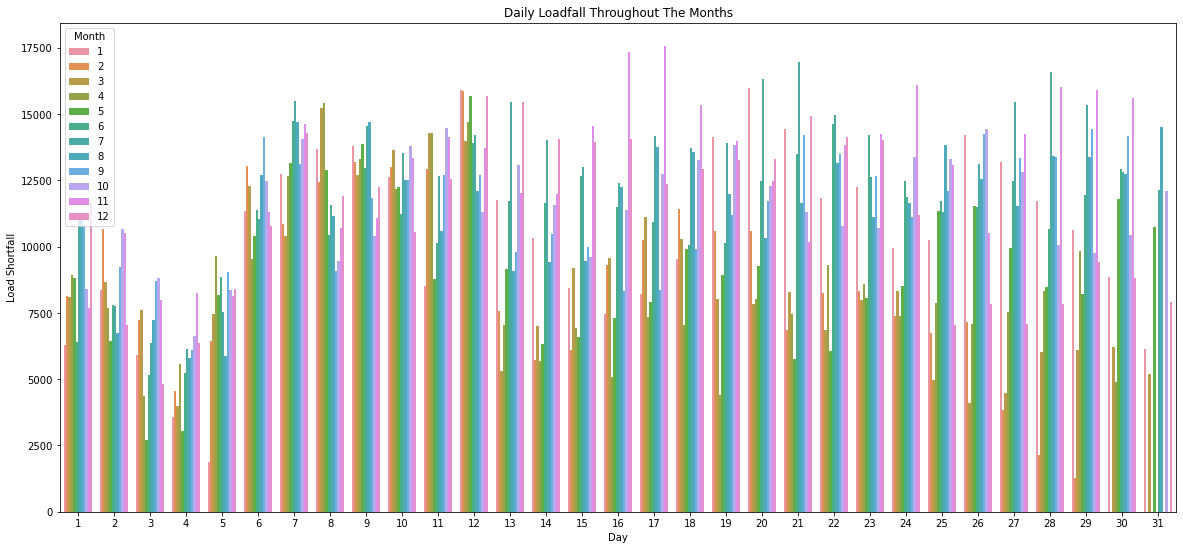

In [20]:
plt.figure(figsize=(20,9))
sns.barplot(data=df,x= 'Day', y= 'load_shortfall_3h' ,hue='Month',ci=None)
plt.ylabel('Load Shortfall')
plt.title('Daily Loadfall Throughout The Months');

Text(0.5, 1.0, 'Daily Loadfall Throughout The Year')

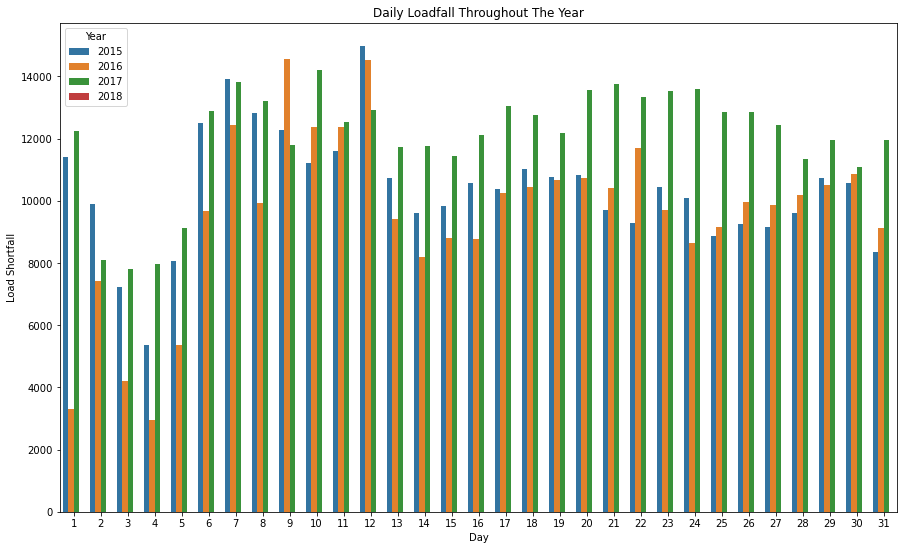

In [21]:
# There is some similarity between Daily Loadfall Thought the month and daily Loadfall throughtout the Year
plt.figure(figsize=(15,9))
sns.barplot(data=df,x= 'Day', y= 'load_shortfall_3h' ,hue='Year',ci=None)
plt.ylabel('Load Shortfall')
plt.title('Daily Loadfall Throughout The Year')

Text(0.5, 1.0, 'Monthly Loadfall Throughout The Year')

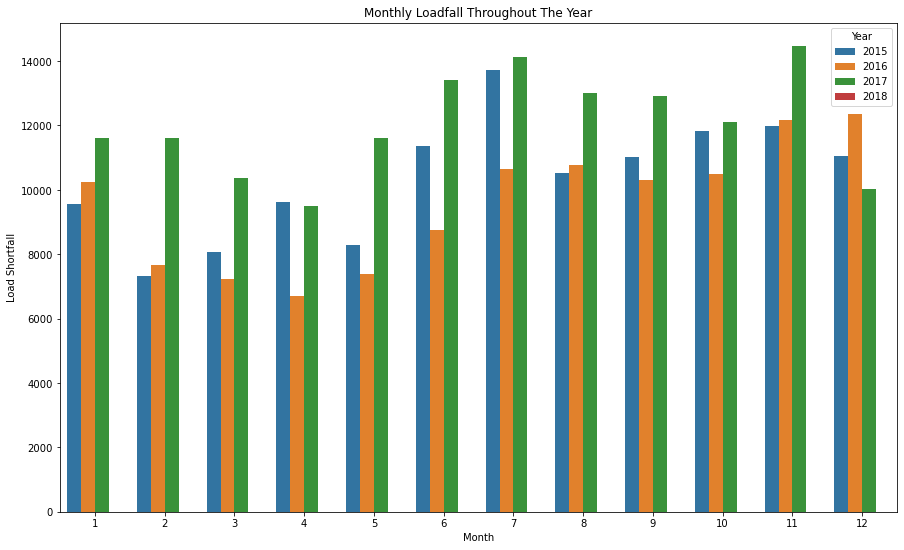

In [22]:
#Monthly loadfall throughtout the year 
plt.figure(figsize=(15,9))
sns.barplot(data=df,x= 'Month', y= 'load_shortfall_3h' ,hue='Year',ci=None)
plt.ylabel('Load Shortfall')
plt.title('Monthly Loadfall Throughout The Year')

Since there are both numeric and categorical columns, numeric columns will be used for correlation 

In [23]:
numeric_cols = raw_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = raw_train.select_dtypes(include='object').columns.tolist()

In [24]:
# evaluate correlation
df[numeric_cols].corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.070696,-0.228261,-0.005374,0.019263,0.009600,-0.051515,0.102284,-0.060676,-0.084866,-0.184973,-0.111486,-0.012189,-0.017188,-0.096454,-0.032337,-0.081446,-0.035734,-0.078270,0.000858,-0.108285,-0.024763,-0.030246,0.001238,-0.036954,0.034761,0.209324,-0.177891,0.343139,0.067406,0.124679,0.156524,-0.090837,0.019380,0.182430,0.021301,0.045680,0.056669,0.026515,0.067137,0.107337,0.125371,-0.021348,0.045585,0.042448,0.192612
Madrid_wind_speed,-0.070696,1.000000,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,0.272295,-0.083599,0.245055,0.429858,0.062114,0.112461,0.062032,0.009569,0.004014,0.170672,-0.013045,0.018883,-0.178500,-0.094986,-0.278214,-0.119056,-0.203967,0.027694,-0.153231,0.109921,0.106533,-0.228350,0.059882,-0.293759,0.100117,0.038752,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Bilbao_rain_1h,-0.228261,0.247761,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,0.070787,-0.020902,0.127963,0.118810,0.060390,0.083222,0.096260,0.051968,0.018764,0.157344,0.003576,0.008780,-0.126045,-0.110104,-0.064473,-0.088641,-0.214059,-0.173351,-0.302455,-0.137050,-0.133444,-0.603190,-0.152139,-0.090703,-0.126690,-0.153656,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,-0.005374,0.524549,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,0.350592,-0.057883,0.229440,0.309374,0.027630,0.048719,0.101233,0.044150,0.022129,0.100311,-0.038103,0.052041,-0.103358,-0.041051,-0.128770,-0.065004,-0.074355,-0.037404,-0.143971,0.067461,0.076280,-0.177013,-0.014881,-0.429268,0.082254,-0.035119,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,0.019263,-0.114347,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,-0.154620,0.169172,0.347442,-0.205987,-0.045171,0.229563,0.018271,0.017912,0.027446,0.148648,0.008624,0.005728,-0.216339,-0.054883,-0.119706,-0.327958,-0.093324,-0.602483,-0.086149,-0.641650,-0.646328,-0.107606,-0.745160,0.459938,-0.635370,-0.602008,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290
Madrid_humidity,0.009600,-0.116172,0.098192,-0.029066,0.794435,1.000000,0.033094,-0.012729,0.363340,-0.091650,-0.065749,0.187128,0.498062,-0.121950,-0.049671,0.196892,0.024683,0.020566,0.048725,0.246944,0.009986,0.010059,-0.346911,-0.067316,-0.098388,-0.286516,-0.170549,-0.610552,-0.100597,-0.702760,-0.699706,-0.140293,-0.741594,0.383107,-0.681341,-0.686650,-0.798668,-0.677792,-0.626489,-0.620312,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,-0.150536
Bilbao_clouds_all,-0.051515,0.225566,0.361385,0.192272,0.055132,0.033094,1.000000,0.024394,0.037675,0.267920,0.081249,-0.056930,0.090741,0.062569,0.053865,0.030161,0.070549,0.032980,0.008520,0.079419,-0.035891,0.021423,-0.073259,-0.120654,0.002846,-0.029508,-0.097868,-0.103973,-0.131503,-0.011646,-0.013887,-0.526723,-0.102323,-0.119219,-0.016264,-0.043627,-0.060564,-0.035391,-0.082353,-0.126287,-0.025979,-0.170196,-0.089831,-0.059928,-0.060271,-0.127293
Bilbao_wind_speed,0.102284,0.382617

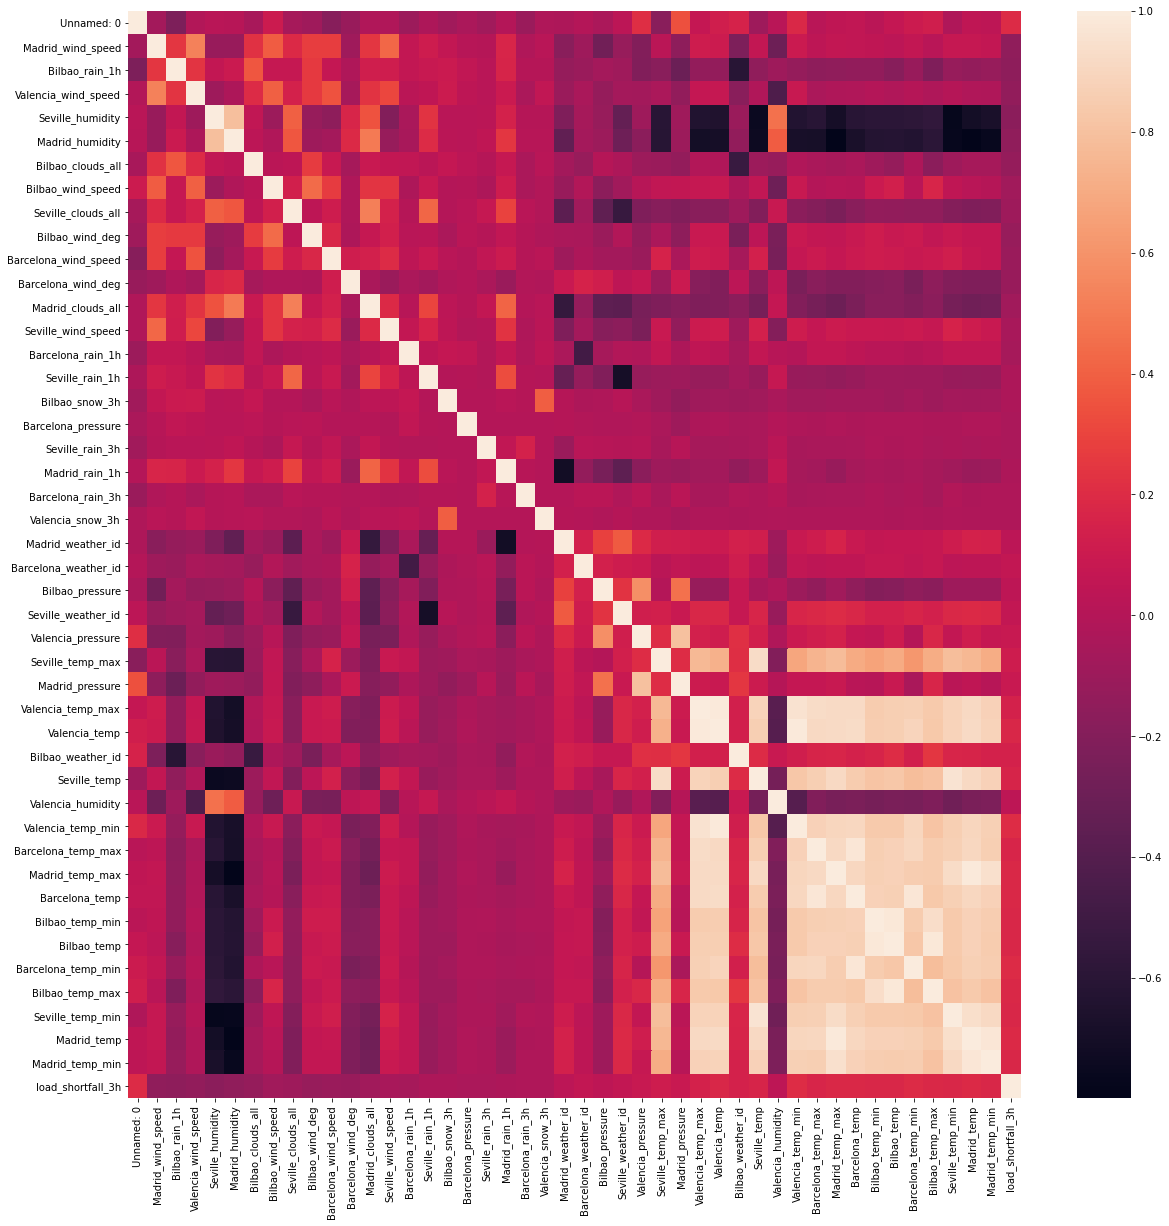

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numeric_cols].corr());

Now it can be seen that there are moderate to high correlations between the various cities. Thus, with increase in temperature  in Madrid,Barcelona,Seville,Valencia or Bilbao shows a resulting increase in temperature between the other cities.
This could be attributed to the cities being in close proximity of each other.
Also, there is strong negetive correlation between the temperatures in the cities and the humidity in the cities. This is expected since humidity is the quantity of water vapour in the atmosphere and decrease in water vapour will result in increase in temperature.

In [26]:
# have a look at feature distributions


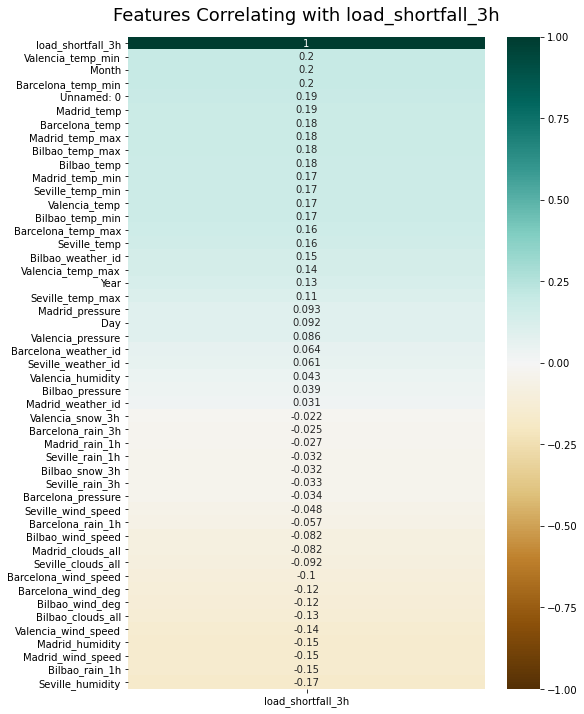

In [27]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['load_shortfall_3h']].sort_values(by='load_shortfall_3h', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with load_shortfall_3h', fontdict={'fontsize':18}, pad=16);


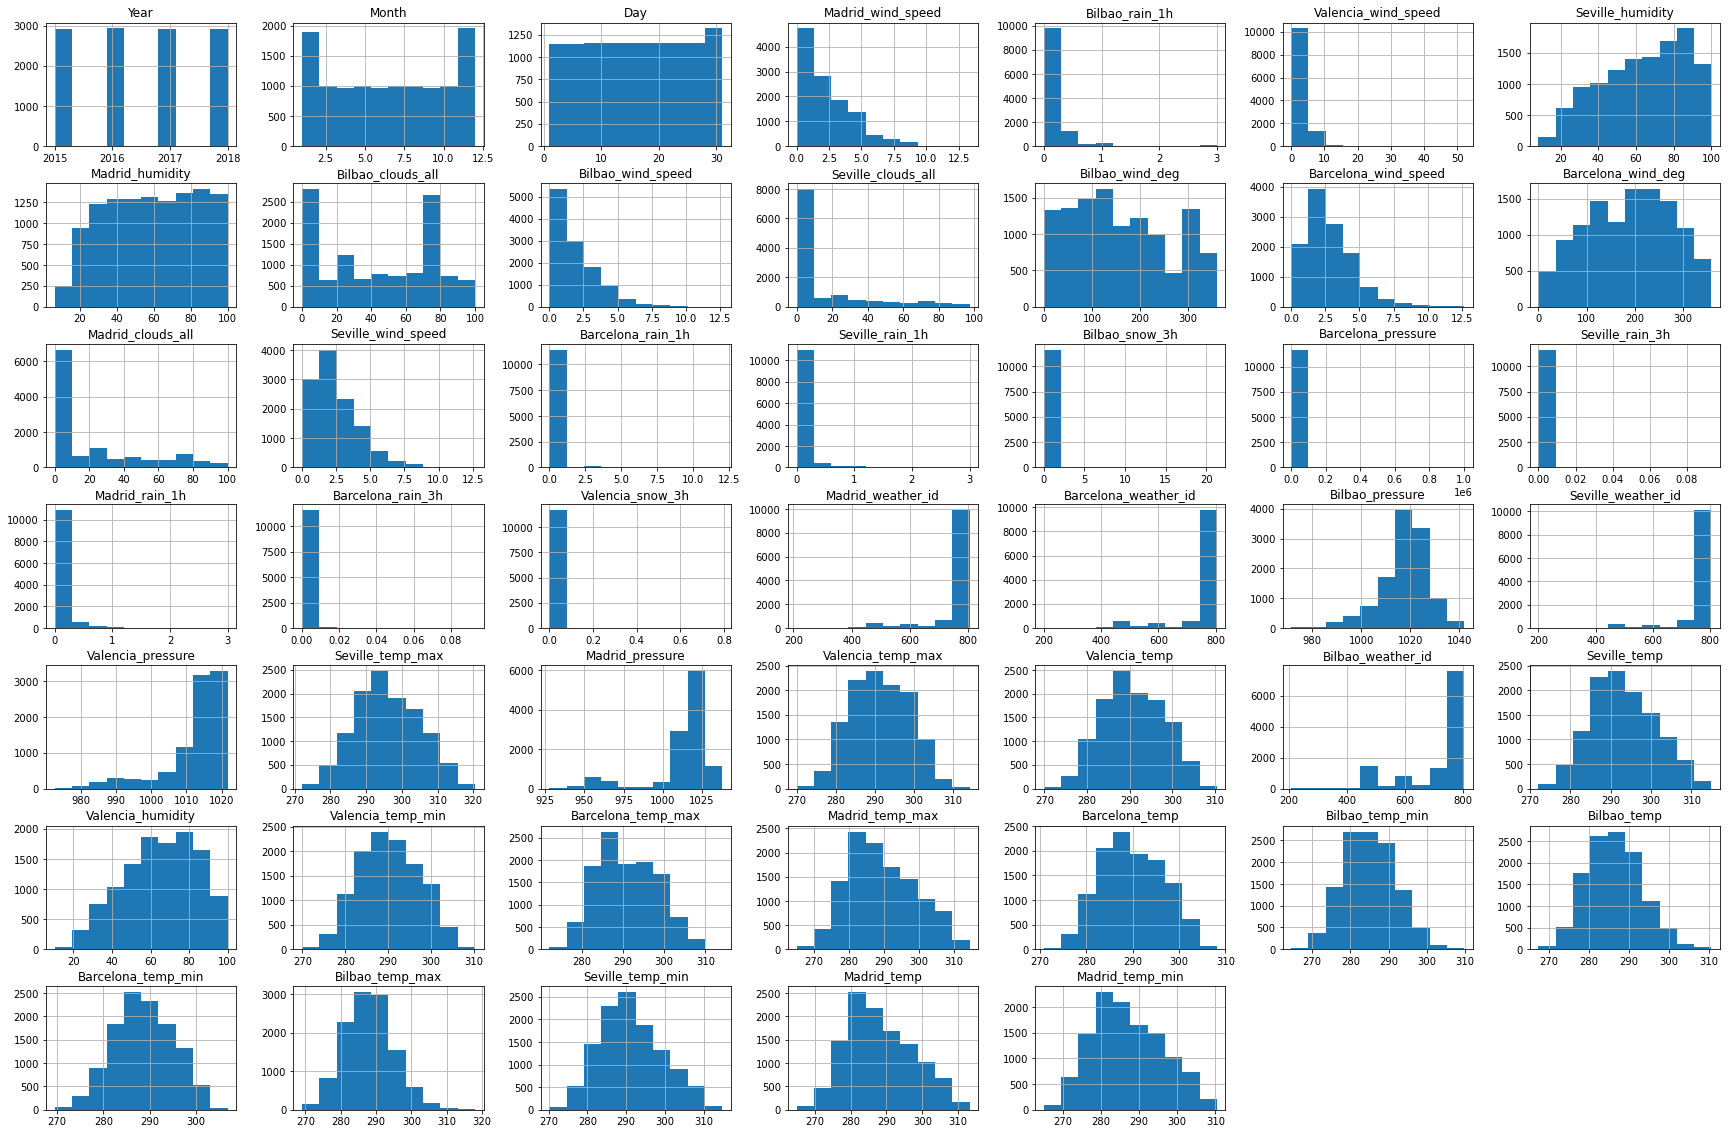

In [28]:
features = df.columns[2:-1]
df[features].hist(figsize=(30,20));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [29]:
# remove missing values/ features

In [30]:
#looking at the percentage of the data with null values. This allows us to decide either to drop the column entirely,drop the rows with the empty data of just Impute the empty values.

#Now, it is evident that 21 percent of the Valencia_presssure is null and 24% of load_shortfall is null. However,load_shortfall is expected because of data merge

(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

load_shortfall_3h       24.993580
Valencia_pressure       21.586921
time                     0.000000
Madrid_weather_id        0.000000
Barcelona_weather_id     0.000000
Bilbao_pressure          0.000000
Seville_weather_id       0.000000
Seville_temp_max         0.000000
Madrid_pressure          0.000000
Valencia_temp_max        0.000000
Valencia_temp            0.000000
Bilbao_weather_id        0.000000
Seville_temp             0.000000
Valencia_humidity        0.000000
Valencia_temp_min        0.000000
Barcelona_temp_max       0.000000
Madrid_temp_max          0.000000
Barcelona_temp           0.000000
Bilbao_temp_min          0.000000
Bilbao_temp              0.000000
Barcelona_temp_min       0.000000
Bilbao_temp_max          0.000000
Seville_temp_min         0.000000
Madrid_temp              0.000000
Madrid_temp_min          0.000000
Valencia_snow_3h         0.000000
Unnamed: 0               0.000000
Madrid_rain_1h           0.000000
Bilbao_wind_speed        0.000000
Year          

In [31]:
df.Valencia_pressure.describe()
#Now, it can be seen that the mean,mode and median of the pressure is similar, thus medain value will be used for imputation

count    9161.000000
mean     1012.346687
std         8.817473
min       972.666667
25%      1010.666667
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

Skewness value for Valencia Pressure:  -1.8005715995930651


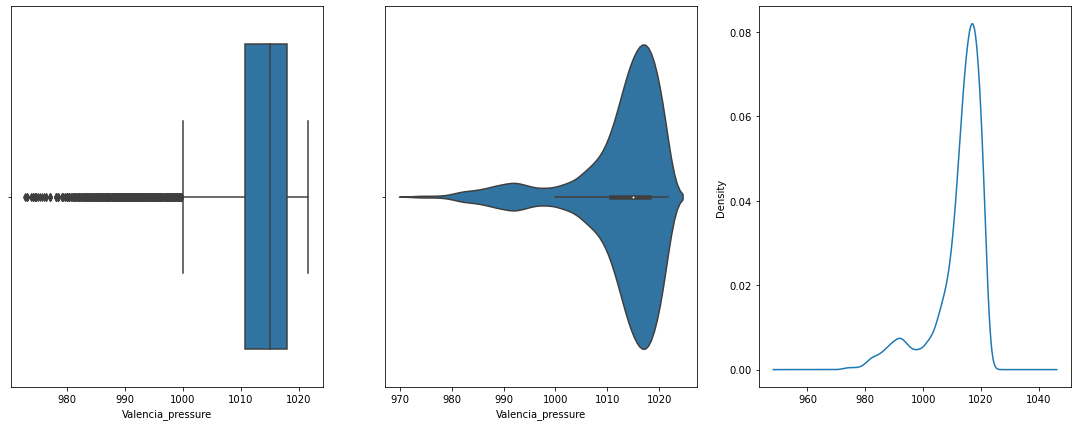

In [32]:
fig,axes = plt.subplots(1,3,sharex=False,figsize=(19,7))
sns.boxplot(x= df['Valencia_pressure'],ax=axes[0]);
sns.violinplot(x=df['Valencia_pressure'],ax=axes[1]);
axes[2]=df['Valencia_pressure'].plot(kind='density')
print('Skewness value for Valencia Pressure: ',df['Valencia_pressure'].skew())

In [33]:
# create new features
mean_valencia_pressure = df['Valencia_pressure'].median()
df['Valencia_pressure']= df['Valencia_pressure'].fillna(value=mean_valencia_pressure)

Skewness value for Valencia Pressure:  -2.1852405763291536


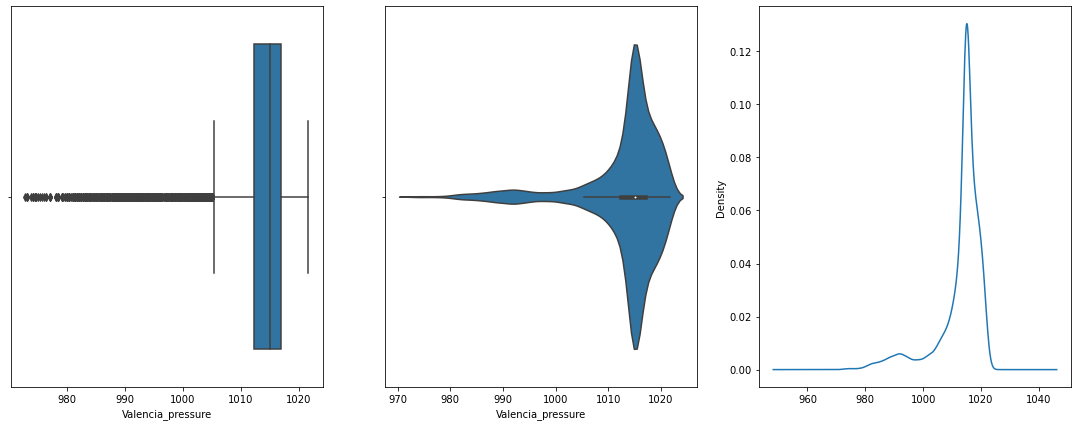

In [34]:
fig,axes = plt.subplots(1,3,sharex=False,figsize=(19,7))
sns.boxplot(x= df['Valencia_pressure'],ax=axes[0]);
sns.violinplot(x=df['Valencia_pressure'],ax=axes[1]);
axes[2]=df['Valencia_pressure'].plot(kind='density')
print('Skewness value for Valencia Pressure: ',df['Valencia_pressure'].skew());

In [35]:

df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')


In [36]:
df['Seville_pressure'] = df['Seville_pressure'].astype(str).astype(int)
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(str).astype(int);

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            11683 non-null  int64         
 1   time                  11683 non-null  datetime64[ns]
 2   Year                  11683 non-null  int64         
 3   Month                 11683 non-null  int64         
 4   Day                   11683 non-null  int64         
 5   Madrid_wind_speed     11683 non-null  float64       
 6   Valencia_wind_deg     11683 non-null  int32         
 7   Bilbao_rain_1h        11683 non-null  float64       
 8   Valencia_wind_speed   11683 non-null  float64       
 9   Seville_humidity      11683 non-null  float64       
 10  Madrid_humidity       11683 non-null  float64       
 11  Bilbao_clouds_all     11683 non-null  float64       
 12  Bilbao_wind_speed     11683 non-null  float64       
 13  Seville_clouds_al

In [38]:
#It can be seen thatboth the wind values and pressure values of Valencia_wind_deg and Seville_pressure respectively can be converted to numerics. The 32 and 64 acounts for 32bit and 64bit machines
print(df.select_dtypes(include=['int64','int32','float64','float32']).columns.tolist())

['Unnamed: 0', 'Year', 'Month', 'Day', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']


In [39]:
# create new features


In [40]:
#City ID's, Unammed and time columns are dropped
df.drop(['Unnamed: 0','Barcelona_weather_id','Madrid_weather_id', 'Seville_weather_id', 'Bilbao_weather_id',  'Madrid_weather_id','time'],axis=1,inplace=True)

In [41]:
df.describe()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2016.500300,6.525122,15.735256,2.433750,5.476590,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,12.780193,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,1017.482011,1012.919456,296.007363,1011.797412,291.362722,290.788513,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.117584,3.447945,8.798064,1.831762,2.863384,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,7.270223,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,9.753552,7.883832,8.929160,19.983122,7.441278,7.157835,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,2015.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,971.333333,972.666667,272.063000,927.666667,269.888000,269.888000,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2016.000000,4.000000,8.000000,1.000000,3.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,1013.333333,1012.333333,289.483333,1012.666667,285.783333,285.395500,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2016.000000,7.000000,16.000000,2.000000,5.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,13.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,1018.666667,1015.000000,295.483333,1017.333333,291.150000,290.483333,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,2017.000000,10.000000,23.000000,3.333333,8.000000,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,19.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,1023.333333,1017.000000,302.816667,1021.666667,297.159167,296.4

In [42]:
#number of unique values in each column
for x in df:
    print('{} : {}'.format(x,df[x].nunique()))

Year : 4
Month : 12
Day : 31
Madrid_wind_speed : 41
Valencia_wind_deg : 10
Bilbao_rain_1h : 21
Valencia_wind_speed : 59
Seville_humidity : 274
Madrid_humidity : 281
Bilbao_clouds_all : 278
Bilbao_wind_speed : 41
Seville_clouds_all : 249
Bilbao_wind_deg : 1048
Barcelona_wind_speed : 40
Barcelona_wind_deg : 997
Madrid_clouds_all : 253
Seville_wind_speed : 41
Barcelona_rain_1h : 32
Seville_pressure : 25
Seville_rain_1h : 17
Bilbao_snow_3h : 83
Barcelona_pressure : 191
Seville_rain_3h : 50
Madrid_rain_1h : 20
Barcelona_rain_3h : 78
Valencia_snow_3h : 6
Bilbao_pressure : 205
Valencia_pressure : 145
Seville_temp_max : 3361
Madrid_pressure : 308
Valencia_temp_max : 3469
Valencia_temp : 4770
Seville_temp : 7535
Valencia_humidity : 261
Valencia_temp_min : 3540
Barcelona_temp_max : 2712
Madrid_temp_max : 3664
Barcelona_temp : 4563
Bilbao_temp_min : 3602
Bilbao_temp : 7693
Barcelona_temp_min : 2644
Bilbao_temp_max : 3760
Seville_temp_min : 3369
Madrid_temp : 8024
Madrid_temp_min : 3917
load_short

In [43]:
df.columns

Index(['Year', 'Month', 'Day', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'],
      dtype='object')

In [ ]:
fig, axs = plt.subplots(7,7, figsize=(30,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

#checking for multicolinearity
from seaborn import pairplot
g = pairplot(df.drop('load_shortfall_3h', axis='columns'))
g.fig.set_size_inches(9,9)

In [44]:
# engineer existing features
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 
MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 
Since StandardScaler  does not guarantee balanced feature scales , due to the influence of the outliers while computing the empirical mean and standard deviation. 
By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 

In [45]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(df)
robust_df = pd.DataFrame(robust_df,columns=df.columns)


In [ ]:
robust_df.describe()

In [46]:
scaler = StandardScaler()
standardrobust_df = scaler.fit_transform(robust_df)
standardrobust_df = pd.DataFrame(standardrobust_df,columns=robust_df.columns)


In [47]:
standardrobust_df.describe()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,1.168300e+04,8.763000e+03
mean,-5.602704e-14,3.209545e-15,3.005575e-16,-1.283176e-16,6.236749e-16,-2.286977e-14,-3.159308e-16,3.388162e-16,4.591703e-16,-3.656713e-16,2.254010e-15,4.186310e-15,-1.057149e-16,8.086791e-15,5.922963e-16,1.234426e-16,7.651730e-16,5.012771e-15,3.613342e-15,8.960801e-16,-1.395368e-15,-4.718483e-17,1.037115e-14,1.253242e-16,6.982676e-15,2.814293e-15,-8.963129e-17,-1.805635e-15,4.966402e-16,-4.905489e-16,-3.693395e-16,-1.021941e-15,-6.792668e-17,1.324988e-16,-1.516092e-16,-9.217807e-18,-8.923217e-17,-4.778815e-16,4.971914e-17,-8.459476e-17,-4.171200e-16,-2.790049e-16,-8.580828e-16,1.343899e-16,3.197914e-16,1.278600e-16
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000057e+00
min,-1.342506e+00,-1.602508e+00,-1.674901e+00,-1.328696e+00,-1.563458e+00,-3.544243e-01,-1.159891e+00,-2.495287e+00,-2.147987e+00,-1.355623e+00,-1.154872e+00,-5.768179e-01,-1.582938e+00,-1.582258e+00,-2.115822e+00,-7.258064e-01,-1.455972e+00,-1.949344e-01,-1.620404e+00,-2.279138e-01,-4.957806e-02,-5.059339e-02,-5.747374e-02,-2.642129e-01,-9.551545e-02,-1.499276e-02,-4.731677e+00,-5.105957e+00,-2.681707e+00,-4.210270e+00,-2.886015e+00,-2.920074e+00,-2.639011e+00,-2.875954e+00,-2.904614e+00,-2.610834e+00,-2.542595e+00,-2.852100e+00,-3.047692e+00,-2.814478e+00,-2.993474e+00,-2.758996e+00,-2.595073e+00,-2.516560e+00,-2.427442e+00,-3.314046e+00
25%,-4.476809e-01,-7.323871e-01,-8.792374e-01,-7.827498e-01,-8.649541e-01,-3.544243e-01,-7.291651e-01,-7.849949e-01,-8.496178e-01,-9.811473e-01,-5.652394e-01,-5.768179e-01,-8.238722e-01,-8.240410e-01,-8.003928e-01,-7.258064e-01,-8.696117e-01,-1.949344e-01,-9.326376e-01,-2.279138e-01,-4.957806e-02,-2.245219e-02,-5.747374e-02,-2.642129e-01,-9.551545e-02,-1.499276e-02,-4.253686e-01,-7.434803e-02,-7.306745e-01,4.350129e-02,-7.498211e-01,-7.534741e-01,-7.211140e-01,-7.226050e-01,-7.569418e-01,-7.882089e-01,-7.533102e-01,-7.563707e-01,-7.238164e-01,-7.367476e-01,-6.988368e-01,-7.169002e-01,-7.104188e-01,-7.595519e-01,-7.595042e-01,-6.292991e-01
50%,-4.476809e-01,1.377338e-01,3.009241e-02,-2.368039e-01,-1.664500e-01,-3.544243e-01,-2.984386e-01,1.451639e-01,2.507281e-02,4.865

In [49]:
########### one hot encoding the month column later ##################
from sklearn.preprocessing import OneHotEncoder

In [50]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
Month_encoded = encoder.fit_transform(df.Month.values.reshape(-1,1))
month_df = pd.DataFrame(Month_encoded,columns=['Jan','Feb','March','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score

In [94]:
# split data
#The target does not need to be Standardised or Normalised, thus it will be excluded in the split
target = raw_train.load_shortfall_3h
train_inputs = robust_df[:len(raw_train)].drop(['load_shortfall_3h','Month'],axis=1)
test_inputs = robust_df[len(raw_train):].drop(['load_shortfall_3h','Month'],axis=1)

In [95]:
train_inputs =pd.concat([month_df[:len(raw_train)],train_inputs],axis=1)
test_inputs = pd.concat([month_df[len(raw_train):],test_inputs],axis=1)

In [96]:
#resetting the index of the test_inputs to zero

test_inputs.reset_index(inplace=True)
test_inputs.drop(columns='index',inplace=True)


In [98]:
train_inputs.drop(['Year','Day','Valencia_temp_min', 'Madrid_temp', 'Barcelona_temp', 'Madrid_temp_max','Bilbao_temp_max', 'Bilbao_temp', 'Madrid_temp_min', 'Seville_temp_min','Valencia_temp', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp' ,  'Valencia_temp_max', 'Seville_temp_max',  'Madrid_clouds_all', 'Seville_clouds_all'],axis=1,inplace=True)
test_inputs.drop(['Year','Day','Valencia_temp_min', 'Madrid_temp', 'Barcelona_temp', 'Madrid_temp_max','Bilbao_temp_max', 'Bilbao_temp', 'Madrid_temp_min', 'Seville_temp_min','Valencia_temp', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp' , 'Valencia_temp_max', 'Seville_temp_max',  'Madrid_clouds_all', 'Seville_clouds_all'],axis=1,inplace=True)



In [99]:
train_df,val_df = train_test_split(train_inputs,random_state=42,test_size=0.25)

In [100]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_inputs.shape :', test_inputs.shape)

train_df.shape : (6572, 38)
val_df.shape : (2191, 38)
test_inputs.shape : (2920, 38)


In [101]:
# create targets and features dataset
train_target,val_target = train_test_split(target,random_state=42,test_size=0.25)

In [102]:
print('train_target.shape :', train_target.shape)
print('val_target :',val_target.shape)

train_target.shape : (6572,)
val_target : (2191,)


In [103]:
# create one or more ML models
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [104]:
linreg = LinearRegression().fit(train_df.drop('Seville_rain_3h',axis=1),train_target)

linreg_val_preds = linreg.predict(val_df.drop('Seville_rain_3h',axis=1))
linreg_preds = linreg.predict(train_df.drop('Seville_rain_3h',axis=1))

In [105]:
# evaluate one or more ML models

linreg_score = linreg.score(train_df.drop('Seville_rain_3h',axis=1),train_target)
val_rmse = mean_squared_error(val_target,linreg_val_preds,squared=False)
train_rmse = mean_squared_error(train_target,linreg_preds,squared=False)
train_r2 =r2_score(train_target,linreg_preds)

print('linear Regression score :',linreg_score)
print('The RMSE loss for the validation set is :',val_rmse)
print('The RMSE loss for the training set is:',train_rmse)
print('The R2 Score loss for the training set is:',train_r2)

linear Regression score : 0.1805351268477341
The RMSE loss for the validation set is : 4818.121624636942
The RMSE loss for the training set is: 4702.601357051656
The R2 Score loss for the training set is: 0.1805351268477341


In [75]:
#weights of the dataset is the sum of the intercepts and coefficeints
weights = linreg.intercept_+ linreg.coef_

weights_df = pd.DataFrame({
    'Columns': train_df.drop('Seville_rain_3h',axis=1).columns,
    'weight': weights
}).sort_values('weight', ascending=False)
weights_df
#This shows the metrics from most significance

,Columns,weight
51,Madrid_temp,17536.205328
42,Valencia_temp_min,15677.832253
46,Bilbao_temp_min,15212.990396
40,Seville_temp,14898.524026
49,Bilbao_temp_max,13572.677495
0,Jan,12642.378164
45,Barcelona_temp,12254.660040
10,Nov,12207.465532
11,Dec,12153.193864
32,Barcelona_rain_3h,11914.802138


In [ ]:
weights_df.plot(kind='barh')

In [ ]:
linreg = LinearRegression().fit(train_df,train_target)

linreg_val_preds = linreg.predict(val_df)
linreg_preds = linreg.predict(train_df)


# evaluate one or more ML models

linreg_score = linreg.score(train_df,train_target)
val_rmse = mean_squared_error(val_target,linreg_val_preds,squared=False)
train_rmse = mean_squared_error(train_target,linreg_preds,squared=False)
train_r2 =r2_score(train_target,linreg_preds)

print('linear Regression score :',linreg_score)
print('The RMSE loss for the validation set is :',val_rmse)
print('The RMSE loss for the training set is:',train_rmse)
print('The R2 Score loss for the training set is:',train_r2)

#weights of the dataset is the sum of the intercepts and coefficeints
weights = linreg.intercept_+ linreg.coef_

weights_df = pd.DataFrame({
    'Columns': train_df.columns,
    'weight': weights
}).sort_values('weight', ascending=False)
weights_df
#This shows the metrics from most significance

# Submission
linreg.fit(train_inputs,target)
preds = linreg.predict(test_inputs)

loadfall_df = pd.DataFrame(preds,columns=['load_shortfall_3h'])
loadfall_df.head()

output = pd.DataFrame({'time':raw_test['time']})
submission = output.join(loadfall_df)
submission.to_csv('submission.csv',index=False)

submission

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:

def max_depth_error(md):
    model = RandomForestRegressor(max_depth=md, random_state=42)
    model.fit(train_df, train_target)
    train_acc = 1 - model.score(train_df, train_target)
    val_acc = 1 - model.score(val_df, val_target)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(3, 25)])

In [ ]:
errors_df

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,25, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This shows the maximun depth where we have the lowest validation error.

In [ ]:
regr = RandomForestRegressor(n_estimators = 300, max_features = 'auto', max_depth = 24, random_state = 42)
regr.fit(train_df, train_target)

val_regr = regr.predict(val_df)
train_regr = regr.predict(train_df)

In [ ]:
regr_score = regr.score(train_df,train_target)
val_regr_rmse = mean_squared_error(val_target,val_regr,squared=False)
train_regr_rmse = mean_squared_error(train_target,train_regr,squared=False)

print('Random Forest Regressor Regression score :',regr_score)
print('The RMSE loss for the validation set is :',val_regr_rmse)
print('The RMSE loss for the training set is:',train_regr_rmse)


In [ ]:
#Submission
regr.fit(train_inputs,target)
regr_preds = regr.predict(test_inputs)
regr_loadfall_df = pd.DataFrame(regr_preds,columns=['load_shortfall_3h'])

output = pd.DataFrame({'time':raw_test['time']})
submission = output.join(regr_loadfall_df)
submission.to_csv('submission.csv',index=False)
regr_loadfall_df.head()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN
model_s = KNN(n_neighbors=3)
model_s.fit(train_df,train_target)

pred_s = model_s.predict(val_df)
svr_mse = mean_squared_error(val_target,pred_s, squared=False)
pred_s = model_s.predict(train_df)
svr_mse_train = mean_squared_error(train_target,pred_s, squared=False)
print('Val Error: {} ,train error: {} '.format(svr_mse,svr_mse_train))

In [ ]:
knn_values = np.zeros([10,2])
knn_values[0] =3
knn_values[0][1] = 4
knn_values

In [ ]:
knn_values = np.zeros([10,2])
for i in range(2,12):
    model_s = KNN(n_neighbors=i)
    model_s.fit(train_df,train_target)

    pred_s = model_s.predict(val_df)
    svr_mse = mean_squared_error(val_target,pred_s, squared=False)
    pred_s = model_s.predict(train_df)
    svr_mse_train = mean_squared_error(train_target,pred_s, squared=False)
    print('Val Error: {} ,train error: {} nnumber of neighbours: {}'.format(svr_mse,svr_mse_train,i))
    knn_values[i-2] = svr_mse
    knn_values[i-2][1] = svr_mse_train
    

In [ ]:
#Submission
model_s.fit(train_inputs,target)
knn_preds = model_s.predict(test_inputs)
knn_loadfall_df = pd.DataFrame(knn_preds,columns=['load_shortfall_3h'])

output = pd.DataFrame({'time':raw_test['time']})
submission = output.join(knn_loadfall_df)
submission.to_csv('submission.csv',index=False)
knn_loadfall_df.head()

In [ ]:
from xgboost import XGBRegressor

In [ ]:

model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=220,learning_rate=0.1,max_depth = 7)
model.fit(train_df,train_target)
train_rmse = mean_squared_error(train_target,model.predict(train_df), squared=False)
val_rmse = mean_squared_error(val_target,model.predict(val_df), squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
    

In [ ]:
#test_params(n_estimators=220,max_depth=7) #4117
#test_params(n_estimators=220,learning_rate=0.1) #4045
#test_params(n_estimators=220,learning_rate=0.1,max_depth = 7) #4008
test_params(n_estimators=220,learning_rate=0.1,max_depth = 7)

In [ ]:
#Submission
model.fit(train_inputs,target)
xgboost_preds = model.predict(test_inputs)
xgboost_loadfall_df = pd.DataFrame(xgboost_preds,columns=['load_shortfall_3h'])

output = pd.DataFrame({'time':raw_test['time']})
submission = output.join(xgboost_loadfall_df)
submission.to_csv('submission.csv',index=False)
xgboost_loadfall_df.head()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, val_df, val_target, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
cv_score = mse_scores.mean()
cv_score

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic